In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [29]:
raw_data = os.listdir('checkpoints')
gmf = []
mlp = []
neumf=[]
for line in raw_data:
    if line[:3]=='gmf':
        gmf.append(line.split('_'))
    elif line[:3]=='mlp':
        mlp.append(line.split('_'))
    else:
        neumf.append(line.split('_'))
gmf = pd.DataFrame(gmf)
mlp = pd.DataFrame(mlp)
neumf = pd.DataFrame(neumf)

In [30]:
mlp.head()

,0,1,2,3,4,5,6,7,8,9
0,mlp,factor8neg4,bz256,166432168,pretrain,reg,0.0000001,Epoch192,HR0.5364,NDCG0.4551.model
1,mlp,factor8neg4,bz256,166432168,pretrain,reg,0.0000001,Epoch17,HR0.5035,NDCG0.4257.model
2,mlp,factor8neg4,bz256,166432168,pretrain,reg,0.0000001,Epoch123,HR0.5503,NDCG0.4582.model
3,mlp,factor8neg4,bz256,166432168,pretrain,reg,0.0000001,Epoch182,HR0.5520,NDCG0.4612.model
4,mlp,factor8neg4,bz256,166432168,pretrain,reg,0.0000001,Epoch136,HR0.5434,NDCG0.4535.model


In [31]:
gmf['model']=gmf[0]
gmf['epoch']=gmf[2].apply(lambda x: x[5:])
gmf['hr']=gmf[3].apply(lambda x: x[2:])
gmf['ndcg']=gmf[4].apply(lambda x: x[4:-6])

In [32]:
gmf = gmf[['model','epoch', 'hr', 'ndcg']].sort_values('epoch')
gmf['epoch']=gmf['epoch'].astype('int32')
gmf['hr']=gmf['hr'].astype('float64')
gmf['ndcg']=gmf['ndcg'].astype('float64')

In [33]:
gmf=gmf.sort_values('epoch').reset_index(drop=True)
gmf.head()

,model,epoch,hr,ndcg
0,gmf,0,0.1081,0.0541
1,gmf,1,0.1162,0.0579
2,gmf,2,0.1249,0.0623
3,gmf,3,0.1341,0.0666
4,gmf,4,0.1480,0.0745


Text(0.5,1,'Stage 1: GMF')

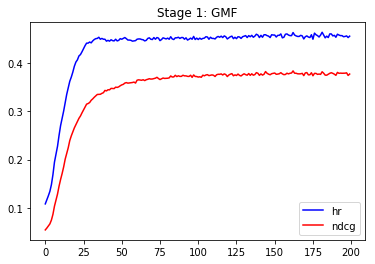

In [34]:
plt.plot(gmf['epoch'].values, gmf['hr'].values, color='b')
plt.plot(gmf['epoch'].values, gmf['ndcg'].values, color='r')
plt.legend(['hr', 'ndcg'])
plt.title('Stage 1: GMF')

In [35]:
mlp['model']=mlp[0]
mlp['epoch']=mlp[7].apply(lambda x: x[5:])
mlp['hr']=mlp[8].apply(lambda x: x[2:])
mlp['ndcg']=mlp[9].apply(lambda x: x[4:-6])

In [36]:
mlp = mlp[['model', 'epoch', 'hr', 'ndcg']].sort_values('epoch')
mlp['epoch']=mlp['epoch'].astype('int32')
mlp['hr']=mlp['hr'].astype('float64')
mlp['ndcg']=mlp['ndcg'].astype('float64')

In [37]:
mlp=mlp.sort_values('epoch').reset_index(drop=True)

In [38]:
mlp.drop_duplicates('epoch', inplace=True)

In [39]:
mlp.head()

,model,epoch,hr,ndcg
0,mlp,0,0.4590,0.3763
1,mlp,1,0.4740,0.3926
2,mlp,2,0.4792,0.4013
3,mlp,3,0.4769,0.3986
4,mlp,4,0.4867,0.4123


Text(0.5,1,'Stage 2: MLP')

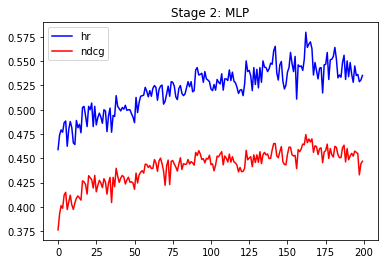

In [40]:
plt.plot(mlp['epoch'].values, mlp['hr'].values, color='b')
plt.plot(mlp['epoch'].values, mlp['ndcg'].values, color='r')
plt.legend(['hr', 'ndcg'])
plt.title('Stage 2: MLP')

In [41]:
neumf['model']=neumf[1]
neumf['epoch']=neumf[3].apply(lambda x: x[5:])
neumf['hr']=neumf[4].apply(lambda x: x[2:])
neumf['ndcg']=neumf[5].apply(lambda x: x[4:-6])

In [42]:
neumf = neumf[['model', 'epoch', 'hr', 'ndcg']].sort_values('epoch')
neumf['epoch']=neumf['epoch'].astype('int32')
neumf['hr']=neumf['hr'].astype('float64')
neumf['ndcg']=neumf['ndcg'].astype('float64')
neumf=neumf.sort_values('epoch').reset_index(drop=True)

Text(0.5,1,'Stage 3 NeuMF')

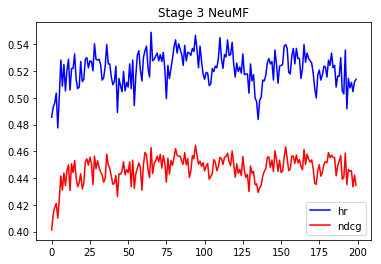

In [44]:
plt.plot(neumf['epoch'].values, neumf['hr'].values, color='b')
plt.plot(neumf['epoch'].values, neumf['ndcg'].values, color='r')
plt.legend(['hr', 'ndcg'])
plt.title('Stage 3 NeuMF')

In [67]:
df = neumf.append(gmf).append(mlp)
df.reset_index(drop=True, inplace=True)
best_result=df.loc[df['hr'].idxmax(axis=1)]
best_result

model       mlp
epoch       162
hr       0.5798
ndcg     0.4744
Name: 562, dtype: object

In [68]:
print('The best performing model is {} with a Hit Rate at {:.2f}% and NDCG at {:.2f}%'.format((best_result[0]).upper(),best_result[2]*100,best_result[3]*100))

The best performing model is MLP with a Hit Rate at 57.98% and NDCG at 47.44%
